In [42]:
import pandas as pd
import numpy as np
from watertap3.utils import watertap_setup, get_case_study, run_model 
from watertap3.utils import run_watertap3, run_model_no_print, run_and_return_model
import pyomo.util.infeasible as infeas
from idaes.core.util.model_statistics import *
import matplotlib.pyplot as plt
from truck_pipe_cost_functions import truck_costing, pipe_costing
from watertap3.utils.post_processing import get_results_table

1. Get LCOW for each treatment train

In [43]:
# Deep well injection

case_study = 'kbhdp'
scenario = 'dwi'
desired_recovery = 0.9
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
m.fs.ro_first_stage.feed.pressure.unfix()
m.fs.ro_second_stage.feed.pressure.unfix()


m.fs.kbhdp_brackish_ave.flow_vol_in.fix(4.5)  #gpm to m3s 72037 * 6.30902e-5/2
m.fs.kbhdp_brackish_ave.conc_mass_in[0, 'tds'].fix(0.698) #kg/m3
m.fs.deep_well_injection.lift_height.fix()

m.fs.costing_param.electricity_price = 0.0652
m = run_and_return_model(m, objective=True,print_it=True)
m, df = get_results_table(m=m, case_study='test', scenario=scenario)    
print('LCOW:', m.fs.costing.LCOW.value())
print('System recovery:',m.fs.costing.system_recovery())


Case Study = KBHDP
Scenario = DWI


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
DEEP WELL INJECTION
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
System recovery already lower than desired recovery.
	Desired: 0.9 
	Current: 0.8962106356411229

Case Study = KBHDP
Scenario = DWI


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASST

In [44]:
# Evaporations ponds

case_study = 'kbhdp'
scenario = 'zld_a'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
m.fs.ro_first_stage.water_recovery.fix(0.85)
# m.fs.ro_first_stage.feed.pressure.unfix()
# m.fs.ro_second_stage.feed.pressure.unfix()

m.fs.kbhdp_brackish_ave.flow_vol_in.fix(4.5)  #gpm to m3s
m.fs.kbhdp_brackish_ave.conc_mass_in[0, 'tds'].fix(2.5) #kg/m3

m.fs.costing_param.electricity_price = 0.0652
m = run_and_return_model(m, objective=True,print_it=True)
m, df = get_results_table(m=m, case_study='test', scenario=scenario)    
print('LCOW:', m.fs.costing.LCOW.value())
print('System recovery:',m.fs.costing.system_recovery())


Case Study = KBHDP
Scenario = ZLD A


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
EVAPORATION POND
LANDFILL ZLD
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = ZLD A


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED ST

In [45]:
# Brine concentrator and crystallizer

case_study = 'kbhdp'
scenario = 'zld_c'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
# m.fs.ro_first_stage.feed.pressure.unfix()
# m.fs.ro_second_stage.feed.pressure.unfix()

m.fs.kbhdp_brackish_ave.flow_vol_in.fix(4.5)  #gpm to m3s
m.fs.kbhdp_brackish_ave.conc_mass_in[0, 'tds'].fix(0.698) #kg/m3

m.fs.costing_param.electricity_price = 0.0652
m = run_and_return_model(m, objective=True,print_it=True)
m, df = get_results_table(m=m, case_study='test', scenario=scenario)    
print('LCOW:', m.fs.costing.LCOW.value())
print('System recovery:',m.fs.costing.system_recovery())


Case Study = KBHDP
Scenario = ZLD C


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
BRINE CONCENTRATOR
CRYSTALLIZER
LANDFILL ZLD
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = ZLD C


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINA

Sensitivity analysis

In [52]:
# Deep well injection
flow_list = [0.5,1.5,2.25,4.5] #m3/s

case_study = 'kbhdp'
scenario = 'dwi'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
m.fs.ro_first_stage.feed.pressure.unfix()
m.fs.ro_second_stage.feed.pressure.unfix()

lcow_dwi =  np.array([])

for flow in flow_list:
    m.fs.kbhdp_brackish_ave.flow_vol_in.fix(flow) 
    m = run_and_return_model(m, objective=True,print_it=True)
    lcow_dwi = np.concatenate((lcow_dwi,[m.fs.costing.LCOW.value()]))
    
m, df = get_results_table(m=m, case_study='high_flow', scenario=scenario)    
dwi_conc_flow = m.fs.deep_well_injection.flow_vol_in[0].value
dwi_recovery = m.fs.costing.system_recovery()


Case Study = KBHDP
Scenario = DWI


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
DEEP WELL INJECTION
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = DWI


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
DEEP WEL

In [47]:
# Evaporation pond
flow_list = [0.5,1.5,2.25,4.5] #m3/s

case_study = 'kbhdp'
scenario = 'zld_a'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
# m.fs.ro_first_stage.feed.pressure.unfix()
# m.fs.ro_second_stage.feed.pressure.unfix()

lcow_evap_pond =  np.array([])
for flow in flow_list:
    m.fs.kbhdp_brackish_ave.flow_vol_in.fix(flow) 
    m = run_and_return_model(m, objective=True,print_it=True)
    lcow_evap_pond = np.concatenate((lcow_evap_pond,[m.fs.costing.LCOW.value()]))
    
m, df = get_results_table(m=m, case_study='high_flow', scenario=scenario)    
evap_pond_conc_flow = m.fs.evaporation_pond.flow_vol_in[0].value
zld_a_landfill_conc_flow = m.fs.landfill_zld.flow_vol_in[0].value

evap_recovery = m.fs.costing.system_recovery()


Case Study = KBHDP
Scenario = ZLD A


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
EVAPORATION POND
LANDFILL ZLD
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = ZLD A


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED ST

In [48]:
# Brine concentrator and crystallizer
flow_list = [0.5,1.5,2.25,4.5] #m3/s

case_study = 'kbhdp'
scenario = 'zld_c'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
m.fs.ro_first_stage.feed.pressure.unfix()
m.fs.ro_second_stage.feed.pressure.unfix()

lcow_brine_cryst =  np.array([])
for flow in flow_list:
    m.fs.kbhdp_brackish_ave.flow_vol_in.fix(flow) 
    m = run_and_return_model(m, objective=True,print_it=True)
    lcow_brine_cryst = np.concatenate((lcow_brine_cryst,[m.fs.costing.LCOW.value()]))
    
m, df = get_results_table(m=m, case_study='high_flow', scenario=scenario)    
zld_c_landfill_conc_flow = m.fs.landfill_zld.flow_vol_in[0].value
zld_c_recovery = m.fs.costing.system_recovery()


Case Study = KBHDP
Scenario = ZLD C


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
BRINE CONCENTRATOR
CRYSTALLIZER
LANDFILL ZLD
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = ZLD C


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINA

In [49]:
print(dwi_conc_flow)
print(evap_pond_conc_flow)
print(zld_c_landfill_conc_flow)

0.48405155614482553
0.28309200207382945
0.000263023970601457


In [53]:
print(dwi_recovery)
print(evap_recovery)
print(zld_c_recovery)

0.9886830686648492
0.9376954190487281
1.0009237019545365


In [5]:
distances = [0,10,20,50,100] # in km

In [51]:
# Deep well injection
# Getting each unit process for treatment train
df = pd.read_csv('/Users/mhardika/Documents/watertap3/WaterTAP3/watertap3/watertap3/results/case_studies/high_flow_dwi.csv')
units = df['Unit Process Name'].unique() 

data_dwi= pd.DataFrame( columns = units[1::])
pipe_cost_list = []
recovery_list =[]

for d in distances:
    new_row = np.array([df[(df['Variable'] == 'Unit LCOW') ]['Value'].values])
    new_row = new_row.reshape((1,13))

    temp = pd.DataFrame(new_row , columns = units[1::],index = ['dwi'] )
    data_dwi= pd.concat([data_dwi,temp])
    dwi_conc_flow = df[(df['Unit Process Name']== 'Deep Well Injection') & (df['Variable']== 'Inlet Water Flow')]['Value'].values[0]
    dwi_recovery = df[(df['Unit Process Name']== 'System') & (df['Variable']== 'Water Recovery')]['Value'].values[0]/100
    # Pipe cost was first calculated based on brine volume and then corrected to feed volume basis 
    pipe_cost_list.append(pipe_costing(dwi_conc_flow*3600*24,d)*(1-dwi_recovery)/dwi_recovery)
    recovery_list.append(df[(df['Unit Process Name']== 'System') & (df['Variable']== 'Water Recovery')]['Value'].values[0]/100)

data_dwi.reset_index(inplace=True)
data_dwi.insert(loc=1,column='Recovery',value=recovery_list)
data_dwi.insert(loc=2,column='Distance',value=distances)
data_dwi['Pipe Cost'] = pipe_cost_list
data_dwi = data_dwi.rename(columns={'index':'scenario'})
# print(pipe_cost_list)
data_dwi

,scenario,Recovery,Distance,Well Field,Media Filtration,Cartridge Filtration,Anti-Scalant Addition,RO First Stage,Passthrough,Lime Softening,RO Second Stage,Caustic Soda Addition,Chlorination,Treated Storage,Deep Well Injection,Municipal Drinking,Pipe Cost
0,dwi,0.89307,0,0.023603,0.015131,0.00578,0.017377,0.184168,0.0,0.082179,0.023615,0.006686,0.010768,0.02113,0.042565,0.021207,0.000000
1,dwi,0.89307,10,0.023603,0.015131,0.00578,0.017377,0.184168,0.0,0.082179,0.023615,0.006686,0.010768,0.02113,0.042565,0.021207,0.012039
2,dwi,0.89307,20,0.023603,0.015131,0.00578,0.017377,0.184168,0.0,0.082179,0.023615,0.006686,0.010768,0.02113,0.042565,0.021207,0.016873
3,dwi,0.89307,50,0.023603,0.015131,0.00578,0.017377,0.184168,0.0,0.082179,0.023615,0.006686,0.010768,0.02113,0.042565,0.021207,0.031490
4,dwi,0.89307,100,0.023603,0.015131,0.00578,0.017377,0.184168,0.0,0.082179,0.023615,0.006686,0.010768,0.02113,0.042565,0.021207,0.055891


In [36]:
# Evaporation pond
# Getting each unit process for treatment train
df = pd.read_csv('/Users/mhardika/Documents/watertap3/WaterTAP3/watertap3/watertap3/results/case_studies/high_flow_zld_a.csv')
units = df['Unit Process Name'].unique() 

data_zld_a= pd.DataFrame(columns =  units[1::])
pipe_cost_list = []
truck_cost_list = []
recovery_list =[]

for d in distances:
    new_row = np.array([df[(df['Variable'] == 'Unit LCOW') ]['Value'].values])
    new_row = new_row.reshape((1,14))
    temp = pd.DataFrame(new_row , columns = units[1::],index = ['zld_a'] )
    data_zld_a= pd.concat([data_zld_a,temp])
    evap_pond_conc_flow = df[(df['Unit Process Name']== 'Evaporation Pond') & (df['Variable']== 'Inlet Water Flow')]['Value'].values[0]
    zld_a_landfill_conc_flow = df[(df['Unit Process Name']== 'Landfill ZLD') & (df['Variable']== 'Inlet Water Flow')]['Value'].values[0]
    evap_recovery = df[(df['Unit Process Name']== 'System') & (df['Variable']== 'Water Recovery')]['Value'].values[0]/100
    # Pipe cost was first calculated based on brine volume and then corrected to feed volume basis 
    pipe_cost_list.append(pipe_costing(evap_pond_conc_flow*3600*24,d)*(1-evap_recovery)/evap_recovery)
    #Truck cost is corrected to feed volume basis
    truck_cost_list.append(truck_costing(d)*zld_a_landfill_conc_flow/flow_list[-1])
    recovery_list.append(df[(df['Unit Process Name']== 'System') & (df['Variable']== 'Water Recovery')]['Value'].values[0]/100)

data_zld_a.reset_index(inplace=True)
data_zld_a.insert(loc=1,column='Recovery',value=recovery_list)
data_zld_a.insert(loc=2,column='Evap Conc Flow',value=evap_pond_conc_flow)
data_zld_a.insert(loc=3,column='Landfill Conc Flow',value=zld_a_landfill_conc_flow)
data_zld_a.insert(loc=4,column='Distance',value=distances)
data_zld_a['Pipe Cost'] = pipe_cost_list
data_zld_a['Truck Cost'] = truck_cost_list
data_zld_a = data_zld_a.rename(columns={'index':'scenario'})

data_zld_a

,scenario,Recovery,Evap Conc Flow,Landfill Conc Flow,Distance,Well Field,Media Filtration,Cartridge Filtration,Anti-Scalant Addition,RO First Stage,...,Lime Softening,RO Second Stage,Caustic Soda Addition,Chlorination,Treated Storage,Evaporation Pond,Landfill ZLD,Municipal Drinking,Pipe Cost,Truck Cost
0,zld_a,0.937695,0.283092,0.028309,0,0.02248,0.014411,0.005505,0.01655,0.111065,...,0.144271,0.178783,0.006651,0.010531,0.020845,0.036301,0.587586,0.021178,0.000000,0.000000
1,zld_a,0.937695,0.283092,0.028309,10,0.02248,0.014411,0.005505,0.01655,0.111065,...,0.144271,0.178783,0.006651,0.010531,0.020845,0.036301,0.587586,0.021178,0.008638,0.015312
2,zld_a,0.937695,0.283092,0.028309,20,0.02248,0.014411,0.005505,0.01655,0.111065,...,0.144271,0.178783,0.006651,0.010531,0.020845,0.036301,0.587586,0.021178,0.011734,0.017414
3,zld_a,0.937695,0.283092,0.028309,50,0.02248,0.014411,0.005505,0.01655,0.111065,...,0.144271,0.178783,0.006651,0.010531,0.020845,0.036301,0.587586,0.021178,0.021241,0.023721
4,zld_a,0.937695,0.283092,0.028309,100,0.02248,0.014411,0.005505,0.01655,0.111065,...,0.144271,0.178783,0.006651,0.010531,0.020845,0.036301,0.587586,0.021178,0.036941,0.034233


In [30]:
# Brine concentrator and crystallizer
# Getting each unit process for treatment train
df = pd.read_csv('/Users/mhardika/Documents/watertap3/WaterTAP3/watertap3/watertap3/results/case_studies/high_flow_zld_c.csv')
units = df['Unit Process Name'].unique() 

data_zld_c= pd.DataFrame( columns = units[1::])
truck_cost_list = []
recovery_list =[]

for d in distances:
    new_row = np.array([df[(df['Variable'] == 'Unit LCOW') ]['Value'].values])
    new_row = new_row.reshape((1,15))
    temp = pd.DataFrame(new_row , columns = units[1::],index = ['zld_c'] )
    data_zld_c= pd.concat([data_zld_c,temp])
    #Truck cost is corrected to feed volume basis
    zld_c_landfill_conc_flow =  df[(df['Unit Process Name']== 'Landfill ZLD') & (df['Variable']== 'Inlet Water Flow')]['Value'].values[0]
    truck_cost_list.append(truck_costing(d)*(zld_c_landfill_conc_flow/flow_list[-1]))
    recovery_list.append(df[(df['Unit Process Name']== 'System') & (df['Variable']== 'Water Recovery')]['Value'].values[0]/100)

data_zld_c.reset_index(inplace=True)
data_zld_c.insert(loc=1,column='Recovery',value=recovery_list)
data_zld_c.insert(loc=2,column='Conc Flow',value=zld_c_landfill_conc_flow)
data_zld_c.insert(loc=3,column='Distance',value=distances)
data_zld_c['Truck Cost'] = truck_cost_list
data_zld_c = data_zld_c.rename(columns={'index':'scenario'})

data_zld_c

,scenario,Recovery,Conc Flow,Distance,Well Field,Media Filtration,Cartridge Filtration,Anti-Scalant Addition,RO First Stage,Passthrough,Lime Softening,RO Second Stage,Caustic Soda Addition,Chlorination,Treated Storage,Brine Concentrator,Crystallizer,Landfill ZLD,Municipal Drinking,Truck Cost
0,zld_c,1.000283,0.001763,0,0.021073,0.013509,0.00516,0.015514,0.152213,0.0,0.080903,0.06557,0.006144,0.009783,0.020472,0.163871,0.072246,0.057194,0.02114,0.000000
1,zld_c,1.000283,0.001763,10,0.021073,0.013509,0.00516,0.015514,0.152213,0.0,0.080903,0.06557,0.006144,0.009783,0.020472,0.163871,0.072246,0.057194,0.02114,0.000953
2,zld_c,1.000283,0.001763,20,0.021073,0.013509,0.00516,0.015514,0.152213,0.0,0.080903,0.06557,0.006144,0.009783,0.020472,0.163871,0.072246,0.057194,0.02114,0.001084
3,zld_c,1.000283,0.001763,50,0.021073,0.013509,0.00516,0.015514,0.152213,0.0,0.080903,0.06557,0.006144,0.009783,0.020472,0.163871,0.072246,0.057194,0.02114,0.001477
4,zld_c,1.000283,0.001763,100,0.021073,0.013509,0.00516,0.015514,0.152213,0.0,0.080903,0.06557,0.006144,0.009783,0.020472,0.163871,0.072246,0.057194,0.02114,0.002132


Plot sensitivity results

Text(0.5, 1.0, 'Deep Well Injection')

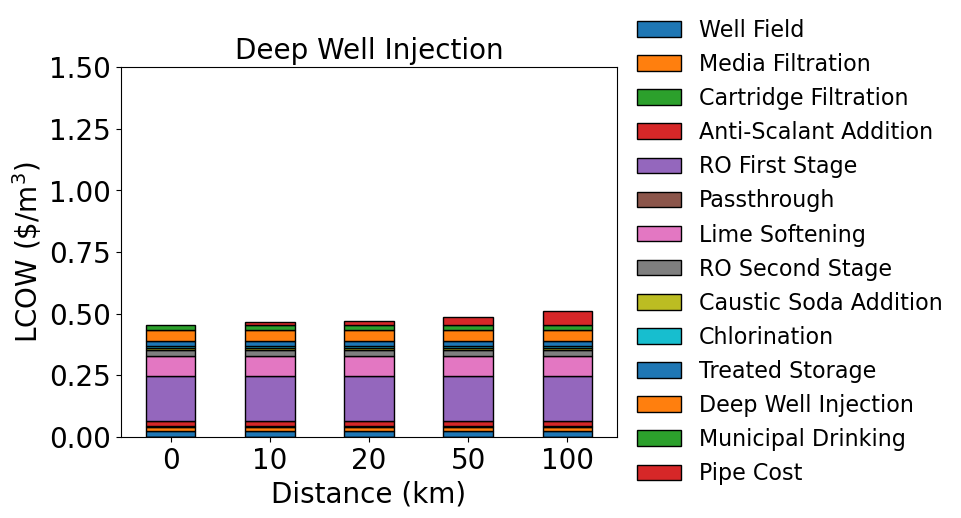

<Figure size 1000x700 with 0 Axes>

In [27]:
colors = plt.cm.GnBu(np.linspace(0, 1, 15))
ax = data_dwi.iloc[:,2::].plot.bar(x='Distance',stacked = True, edgecolor = 'black') #color=
plt.figure(figsize=(10,7))
ax.set_ylim([0,1.5])
ax.set_xticklabels([0,10,20,50,100], rotation = 0,fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Distance (km)',fontsize =20)
ax.set_ylabel(r'LCOW (\$/m${^3}$)',fontsize =20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16,frameon=False)
ax.set_title('Deep Well Injection',fontsize =20)

Text(0.5, 1.0, 'Evaporation Pond')

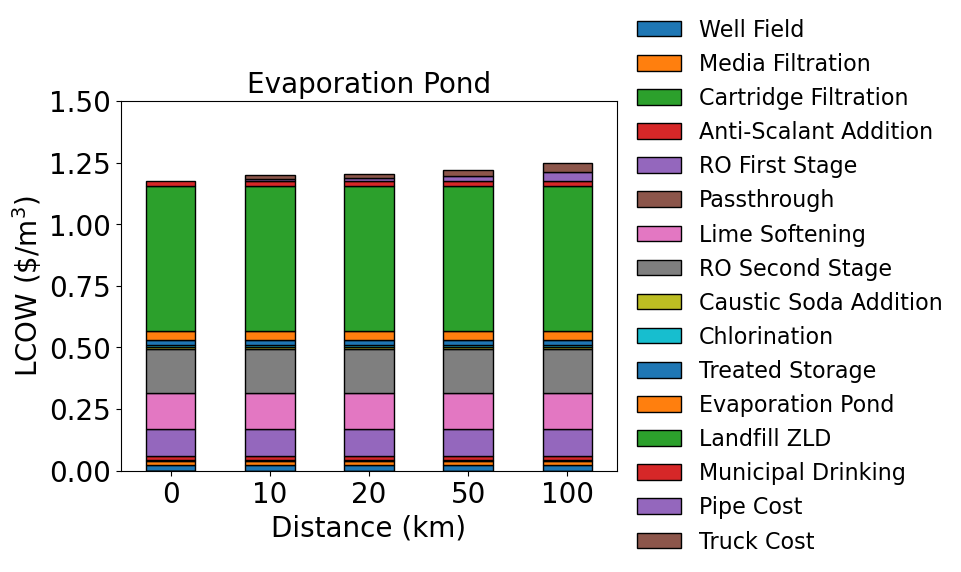

<Figure size 1000x700 with 0 Axes>

In [28]:
# Evaporation Pond
colors = plt.cm.GnBu(np.linspace(0, 1, 15))
ax = data_zld_a.iloc[:,2::].plot.bar(x='Distance',stacked = True, edgecolor = 'black') #color=
plt.figure(figsize=(10,7))
ax.set_ylim([0,1.5])
ax.set_xticklabels([0,10,20,50,100], rotation = 0,fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Distance (km)',fontsize =20)
ax.set_ylabel(r'LCOW (\$/m${^3}$)',fontsize =20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16,frameon=False)
ax.set_title('Evaporation Pond',fontsize =20)

Text(0.5, 1.0, 'Brine concentrator and crystallizer')

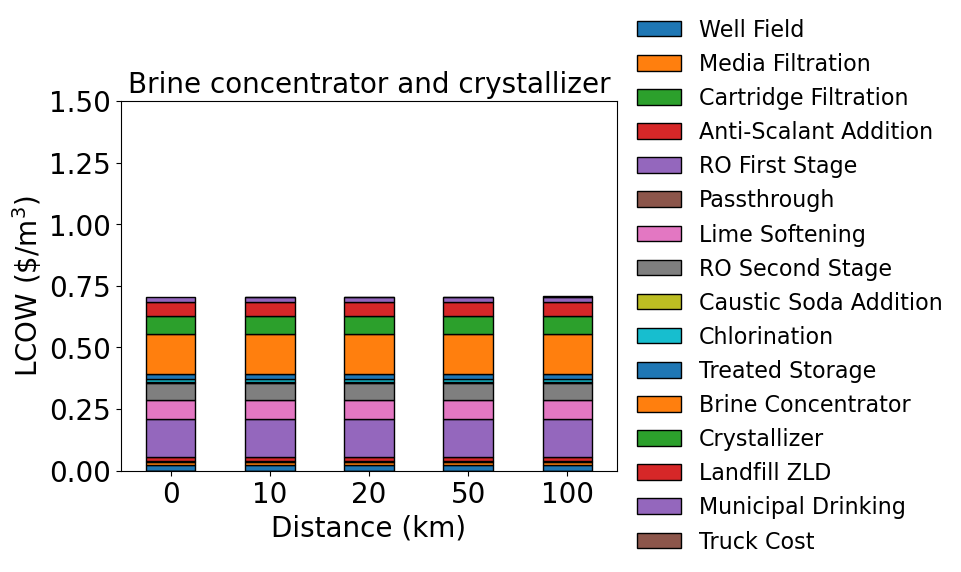

<Figure size 1000x700 with 0 Axes>

In [29]:
# Brine concentrator and crystallizer
colors = plt.cm.GnBu(np.linspace(0, 1, 15))
ax = data_zld_c.iloc[:,2::].plot.bar(x='Distance',stacked = True, edgecolor = 'black') #color=
plt.figure(figsize=(10,7))
ax.set_ylim([0,1.5])
ax.set_xticklabels([0,10,20,50,100], rotation = 0,fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Distance (km)',fontsize =20)
ax.set_ylabel(r'LCOW (\$/m${^3}$)',fontsize =20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16,frameon=False)
ax.set_title('Brine concentrator and crystallizer',fontsize =20)